In [15]:
import spectral_entropy
import sqlalchemy
import numpy as np
import matplotlib.pyplot as plt

In [4]:
database_address='../../data/database/bucketbase.db'

In [5]:
def execute_query(database_addres,query_string):
    '''
    
    '''
    engine=sqlalchemy.create_engine(f"sqlite:///{database_address}")
    connection=engine.connect()

    temp_cursor=connection.execute(
        query_string
    )

    temp_result=temp_cursor.fetchall()
    #print(temp_result)
    print(len(temp_result))
    
    connection.close()
    engine.dispose()
    print(len(temp_result))

    if len(temp_result)==0:
        return -1
    elif len(temp_result)>1:
        print('here')
        return temp_result

In [6]:
def parse_one_ms_dial_spectrum(spectrum_text):
    '''
    takes an ms/ms spectrum as a string and returns a tuple of parallel lists?
    '''
    mz_int_pair_list=spectrum_text.split(' ')
    mz_list=[float(temp_pair.split(':')[0]) for temp_pair in mz_int_pair_list]
    intensity_list=[float(temp_pair.split(':')[1]) for temp_pair in mz_int_pair_list]
    
    return np.array([
        mz_list,
        intensity_list
    ])

In [7]:
def normalize_spectrum(spectrum):
    '''
    divides each intensity by the  max of the intensities
    '''
    spectrum[1]=spectrum[1]/(spectrum[1].max())
    return spectrum

In [8]:
def plot_some_head_to_tails(spectra):
    '''
    expects a list of spectra
    in the outer list, each spectrum is an element
    within each of those elements, the 0th element is an array of mz and teh 1th is array of intensities
    '''
    
    for spectrum in spectra:
        #print(spectrum)
        plt.stem(spectrum[0],spectrum[1])
    plt.show

In [9]:
def make_spectra_like_similarity_metric_expects(spectra):
    '''
    converts an array of parallel mz and intensity into pairs of mz,intensity
    '''
    output_list=list()
    for spectrum in spectra:
        #print(spectrum)
        output_list.append(np.column_stack(spectrum))
        #print(output_list)
        #hold=input('hold')
    return output_list

In [49]:
def make_spectra_like_head_to_tails_expects(spectra):
    '''
    converts an array of parallel mz and intensity into pairs of mz,intensity
    '''
    output_list=list()
    for spectrum in spectra:
        #print(spectrum)
        output_list.append(np.stack(spectrum,axis=1))
        #print(output_list)
        #hold=input('hold')
    return output_list

In [50]:
make_spectra_like_head_to_tails_expects([example_cleaned_spectrum])

[array([[5.5054501e+01, 6.5038528e+01, 6.7047379e+01, 6.9069809e+01,
         7.0065086e+01, 7.1068207e+01, 7.2080704e+01, 7.9054108e+01,
         8.0049408e+01, 8.1069778e+01, 8.2065292e+01, 8.4044258e+01,
         8.7044037e+01, 9.5085197e+01, 1.1006000e+02, 1.1203886e+02,
         1.7911800e+02, 1.9609691e+02, 1.9611581e+02, 1.9616948e+02],
        [1.2319816e-02, 2.9039334e-03, 2.5719153e-02, 4.0307920e-03,
         7.1790325e-03, 2.9262421e-03, 3.4219292e-03, 4.1836882e-03,
         3.1096081e-03, 7.6932195e-03, 1.4476137e-02, 5.6527941e-03,
         1.8422428e-01, 7.2007971e-03, 2.8844702e-01, 3.3729591e-03,
         6.9358135e-03, 2.2736758e-01, 2.7432023e-02, 1.6140307e-01]],
       dtype=float32)]

In [10]:
    get_spectrum_sample_query=f'''
    select spectrum from runs r
    inner join annotations a
    on r.run_id=a.run_id
    where (run_type="Sample") and (bin_id=1701) and (spectrum is not null)
    '''

36
36
here


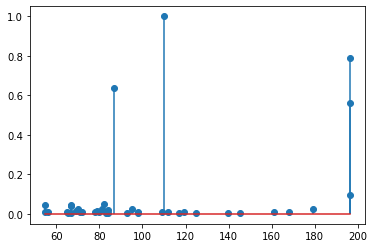

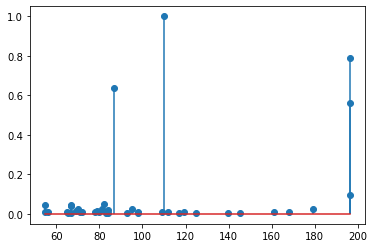

In [24]:
input_spectra_list=execute_query(database_address,get_spectrum_sample_query)

input_spectra_list=[temp_tup[0] for temp_tup in input_spectra_list]

all_spectrum_list=[
    parse_one_ms_dial_spectrum(temp_spectrum) for temp_spectrum in input_spectra_list
]

all_spectrum_list_yuanyue=make_spectra_like_similarity_metric_expects(all_spectrum_list)

#plot_some_head_to_tails(all_spectrum_list)

for i in range(1):
    plot_some_head_to_tails([all_spectrum_list[i]])
plt.show() 

plot_some_head_to_tails([all_spectrum_list[0]])
plt.show()

In [25]:
print(all_spectrum_list_yuanyue[0])

[[5.50181500e+01 8.62441358e-03]
 [5.50545000e+01 4.27108426e-02]
 [5.60497800e+01 7.19078403e-03]
 [6.50385300e+01 1.00674749e-02]
 [6.54793400e+01 6.17592521e-03]
 [6.70416500e+01 4.41293813e-02]
 [6.70452000e+01 6.54753708e-03]
 [6.70543300e+01 3.84872945e-02]
 [6.90698100e+01 1.39741154e-02]
 [7.00650900e+01 2.48885636e-02]
 [7.10682100e+01 1.01448154e-02]
 [7.20807000e+01 1.18632846e-02]
 [7.78933100e+01 7.91137151e-03]
 [7.90541100e+01 1.45041811e-02]
 [8.00494100e+01 1.07805170e-02]
 [8.10697800e+01 2.66711688e-02]
 [8.20652900e+01 5.01864662e-02]
 [8.30853100e+01 6.74183161e-03]
 [8.40442600e+01 1.95973387e-02]
 [8.40807200e+01 7.10778442e-03]
 [8.70440400e+01 6.38676307e-01]
 [9.26526300e+01 6.56262792e-03]
 [9.50852000e+01 2.49640178e-02]
 [9.80593800e+01 6.37965151e-03]
 [9.80957600e+01 7.69066801e-03]
 [1.09052630e+02 9.70718116e-03]
 [1.10060000e+02 1.00000000e+00]
 [1.12038860e+02 1.16935126e-02]
 [1.16848400e+02 7.00969398e-03]
 [1.19085850e+02 8.06416624e-03]
 [1.250704

In [ ]:
def clean_spectrum(spectrum,
                   max_mz: float = None,
                   noise_removal: float = 0.01,
                   ms2_da: float = 0.05, ms2_ppm: float = None) -> np.ndarray:
    """
    Clean the spectrum with the following procedures:
    1. Remove ions have m/z higher than a given m/z (defined as max_mz).
    2. Centroid peaks by merging peaks within a given m/z (defined as ms2_da or ms2_ppm).
    3. Remove ions have intensity lower than max intensity * fixed value (defined as noise_removal)
    
    
    :param spectrum: The input spectrum, need to be in 2-D list or 2-D numpy array
    :param max_mz: The ions with m/z higher than max_mz will be removed.
    :param noise_removal: The ions with intensity lower than max ion's intensity * noise_removal will be removed.
    :param ms2_da: The MS/MS tolerance in Da.
    :param ms2_ppm: The MS/MS tolerance in ppm.
    If both ms2_da and ms2_ppm is given, ms2_da will be used.
    """


In [63]:
example_cleaned_spectrum=spectral_entropy.tools.clean_spectrum(
    all_spectrum_list_yuanyue[0],
    noise_removal=0.01,
    ms2_da=0.03
)

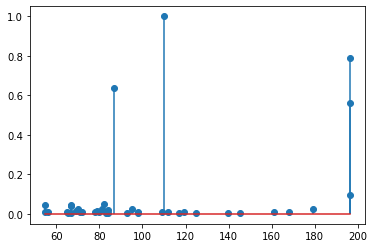

In [52]:
make_spectra_like_head_to_tails_expects([example_cleaned_spectrum])

[array([[5.5054501e+01, 6.5038528e+01, 6.7047379e+01, 6.9069809e+01,
         7.0065086e+01, 7.1068207e+01, 7.2080704e+01, 7.9054108e+01,
         8.0049408e+01, 8.1069778e+01, 8.2065292e+01, 8.4044258e+01,
         8.7044037e+01, 9.5085197e+01, 1.1006000e+02, 1.1203886e+02,
         1.7911800e+02, 1.9609691e+02, 1.9611581e+02, 1.9616948e+02],
        [1.2319816e-02, 2.9039334e-03, 2.5719153e-02, 4.0307920e-03,
         7.1790325e-03, 2.9262421e-03, 3.4219292e-03, 4.1836882e-03,
         3.1096081e-03, 7.6932195e-03, 1.4476137e-02, 5.6527941e-03,
         1.8422428e-01, 7.2007971e-03, 2.8844702e-01, 3.3729591e-03,
         6.9358135e-03, 2.2736758e-01, 2.7432023e-02, 1.6140307e-01]],
       dtype=float32)]

In [53]:
all_spectrum_list[0]

array([[5.50181500e+01, 5.50545000e+01, 5.60497800e+01, 6.50385300e+01,
        6.54793400e+01, 6.70416500e+01, 6.70452000e+01, 6.70543300e+01,
        6.90698100e+01, 7.00650900e+01, 7.10682100e+01, 7.20807000e+01,
        7.78933100e+01, 7.90541100e+01, 8.00494100e+01, 8.10697800e+01,
        8.20652900e+01, 8.30853100e+01, 8.40442600e+01, 8.40807200e+01,
        8.70440400e+01, 9.26526300e+01, 9.50852000e+01, 9.80593800e+01,
        9.80957600e+01, 1.09052630e+02, 1.10060000e+02, 1.12038860e+02,
        1.16848400e+02, 1.19085850e+02, 1.25070480e+02, 1.39845920e+02,
        1.45322510e+02, 1.61107620e+02, 1.68120500e+02, 1.79118000e+02,
        1.96096910e+02, 1.96115810e+02, 1.96169480e+02],
       [8.62441358e-03, 4.27108426e-02, 7.19078403e-03, 1.00674749e-02,
        6.17592521e-03, 4.41293813e-02, 6.54753708e-03, 3.84872945e-02,
        1.39741154e-02, 2.48885636e-02, 1.01448154e-02, 1.18632846e-02,
        7.91137151e-03, 1.45041811e-02, 1.07805170e-02, 2.66711688e-02,
       

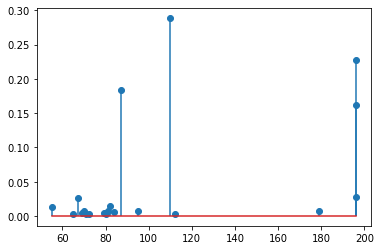

In [54]:



plot_some_head_to_tails(
    make_spectra_like_head_to_tails_expects([example_cleaned_spectrum])
)
plt.show()

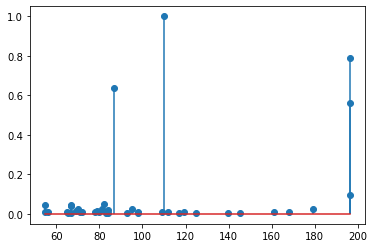

In [58]:
plot_some_head_to_tails([all_spectrum_list[0]])
plt.show()

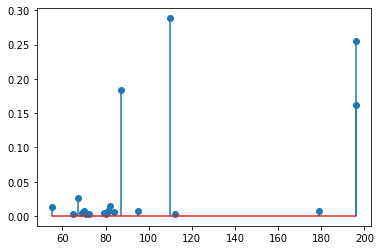

In [64]:
plot_some_head_to_tails(
    make_spectra_like_head_to_tails_expects([example_cleaned_spectrum])
)
plt.show()